In [147]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import  ColumnTransformer

In [148]:
df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [149]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [150]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=.2,random_state=42)

In [152]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\1149245170.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


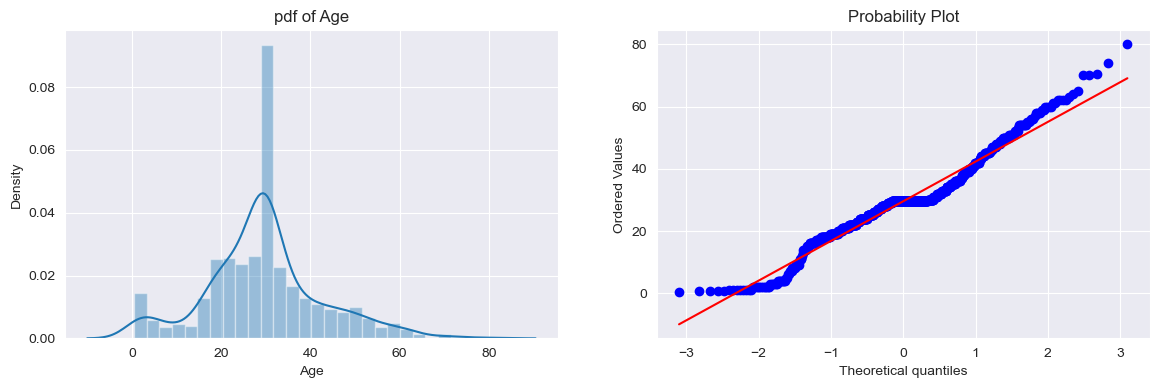

In [153]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("pdf of Age")
sns.distplot(X_train['Age'])

plt.subplot(122)
plt.title("Age QQ plot")
stats.probplot(X_train['Age'],dist="norm",plot=plt)

plt.show()

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\3706889519.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


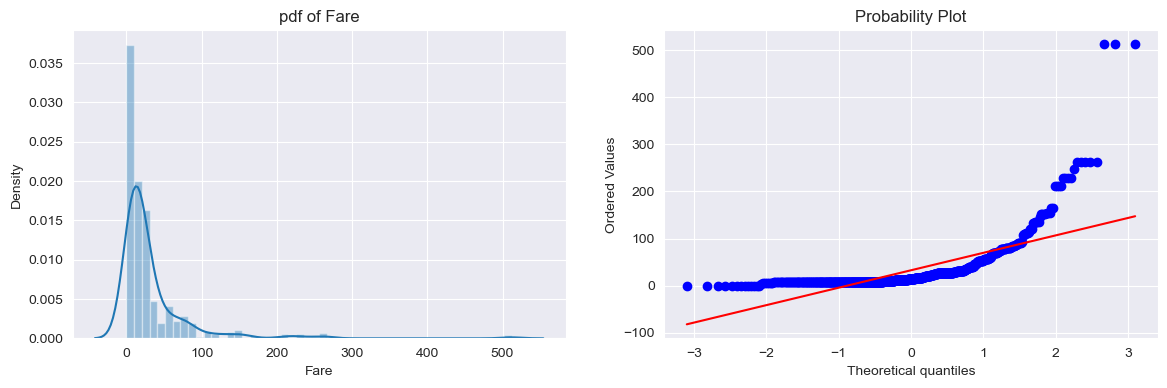

In [154]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("pdf of Fare")
sns.distplot(X_train['Fare'])

plt.subplot(122)
plt.title("Fare QQ plot")
stats.probplot(X_train['Fare'],dist="norm",plot=plt)

plt.show()


# Work-1 : transformation for both fare and age

### without transformer

In [155]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [156]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy LR",accuracy_score(y_pred,y_test))

clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy DT",accuracy_score(y_pred2,y_test))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


# Log transformer

In [157]:
trf = FunctionTransformer(func=np.log1p)

In [158]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [159]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [160]:
clf.fit(X_train_transformed,y_train)
y_pred = clf.predict(X_test_transformed)
print("Accuracy After transformed of LR",accuracy_score(y_pred,y_test))

clf2.fit(X_train_transformed,y_train)
y_pred2 = clf2.predict(X_test_transformed)
print("Accuracy After transformed of DT",accuracy_score(y_pred2,y_test))

Accuracy After transformed of LR 0.6815642458100558
Accuracy After transformed of DT 0.6703910614525139


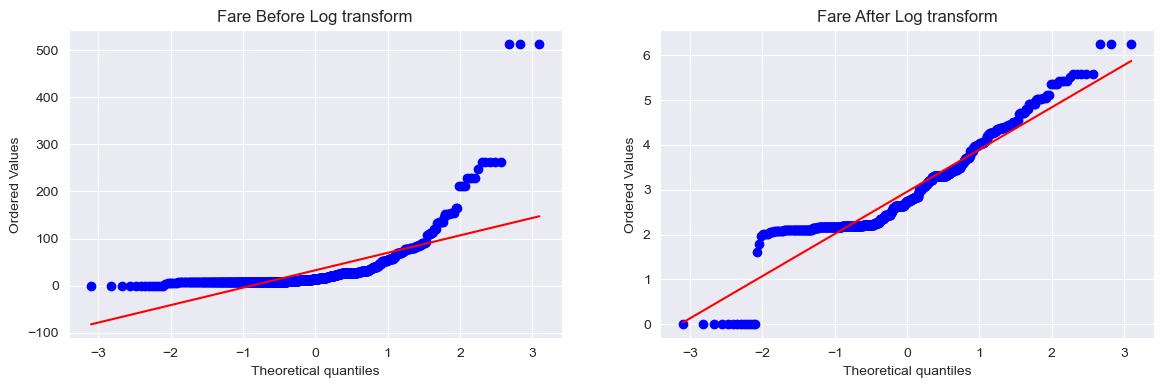

In [161]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log transform')

plt.show()

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\537766017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\537766017.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

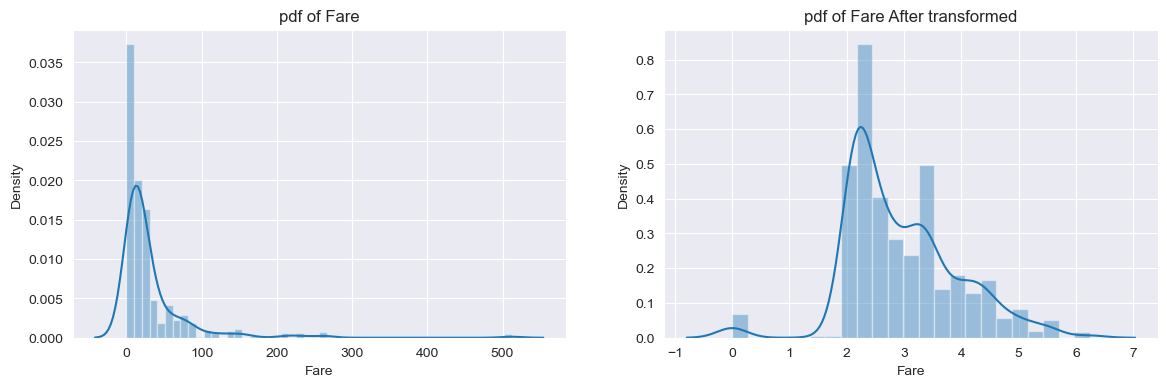

In [162]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("pdf of Fare")
sns.distplot(X_train['Fare'])

plt.subplot(122)
plt.title("pdf of Fare After transformed")
sns.distplot(X_train_transformed['Fare'])

plt.show()


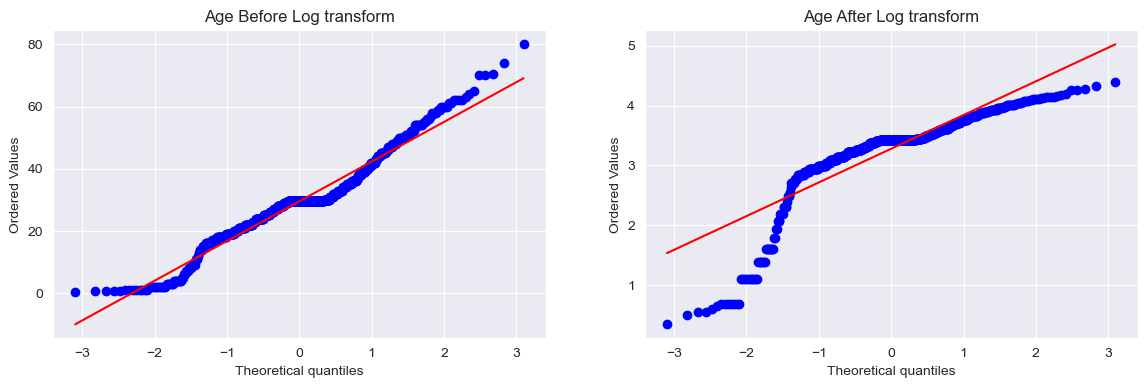

In [163]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log transform')

plt.show()

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\1841167463.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_1860\1841167463.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

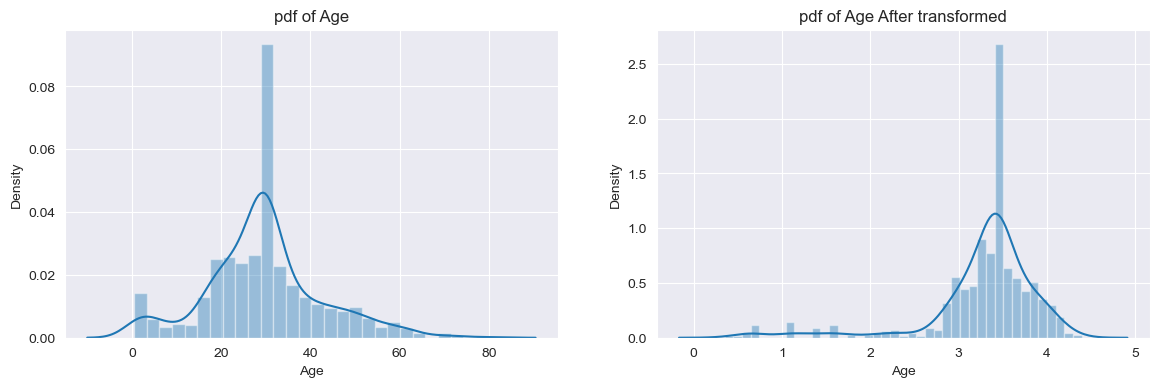

In [164]:
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("pdf of Age")
sns.distplot(X_train['Age'])

plt.subplot(122)
plt.title("pdf of Age After transformed")
sns.distplot(X_train_transformed['Age'])

plt.show()


# Using Cross transformed

In [165]:
trf = FunctionTransformer(func=np.log1p)

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_cross_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Cross transformed LR accuracy avg:",np.mean(cross_val_score(clf,X_cross_transformed,y,scoring='accuracy',cv=10)))
print("Cross transformed DT accuracy avg:",np.mean(cross_val_score(clf2,X_cross_transformed,y,scoring='accuracy',cv=10)))

Cross transformed LR accuracy avg: 0.678027465667915
Cross transformed DT accuracy avg: 0.6599750312109863


# Work-2 : transformation for only fare 

In [166]:
colTrf = ColumnTransformer(transformers=[
    ('fareLog',FunctionTransformer(func=np.log1p),['Fare'])
],remainder='passthrough')

In [167]:
X_train_transformed_onlyFare = colTrf.fit_transform(X_train)
X_test_transformed_onlyFare = colTrf.transform(X_test)

In [168]:
clfLR = LogisticRegression()
clfDC = DecisionTreeClassifier()

In [169]:
clfLR.fit(X_train_transformed,y_train)
y_pred_LR = clfLR.predict(X_test)
print("Accu by LR: ",accuracy_score(y_pred_LR,y_test))

clfDC.fit(X_train_transformed,y_train)
y_pred_DC = clfDC.predict(X_test)
print("Accu by DC: ",accuracy_score(y_pred_DC,y_test))

Accu by LR:  0.7374301675977654
Accu by DC:  0.5865921787709497


## Using cross transform

In [170]:
X_cross_transformed_onlyFare = colTrf.fit_transform(X)

clfLR = LogisticRegression()
clfDC = DecisionTreeClassifier()

In [171]:
print("Cross transformed LR onlyFare accuracy avg",np.mean(cross_val_score(clfLR,X_cross_transformed_onlyFare,y,scoring='accuracy',cv=10)))
print("Cross transformed DC onlyFare accuracy avg",np.mean(cross_val_score(clfDC,X_cross_transformed_onlyFare,y,scoring='accuracy',cv=10)))

Cross transformed LR onlyFare accuracy avg 0.6712609238451936
Cross transformed DC onlyFare accuracy avg 0.6588264669163546


# Apply Transform

In [172]:
def apply_transform(transform,attributes):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),attributes)],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    

In [173]:
apply_transform(lambda x: x,['Fare'])

Accuracy 0.6589013732833957


In [174]:
apply_transform(lambda x: x,['Fare','Age'])

Accuracy 0.6589013732833957


In [175]:
apply_transform(lambda x:x,['Age'])

Accuracy 0.6589013732833957


In [176]:
apply_transform(lambda x: x**2,['Fare'])

Accuracy 0.6442446941323345


In [177]:
apply_transform(lambda x: x**1/2,['Fare'])

Accuracy 0.6589013732833957


In [178]:
apply_transform(lambda x: 1/(x+0.00000001),['Fare'])

Accuracy 0.61729088639201


In [180]:
apply_transform(np.sin,['Fare'])

Accuracy 0.6195131086142323


In [182]:
def apply_transform_view(transform,attribute):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),[attribute])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X[attribute], dist="norm", plot=plt)
    plt.title(f'{attribute} Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title(f'{attribute} After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


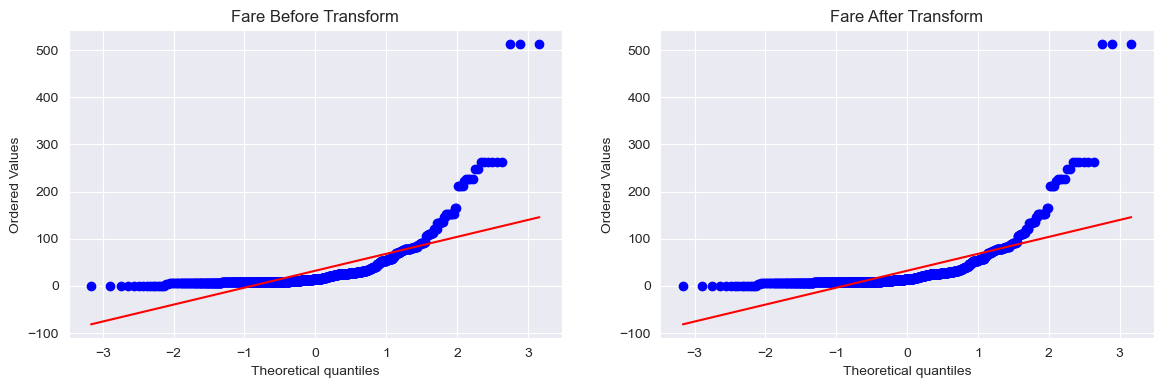

In [183]:
apply_transform_view(lambda x:x,'Fare')

Accuracy 0.6589013732833957


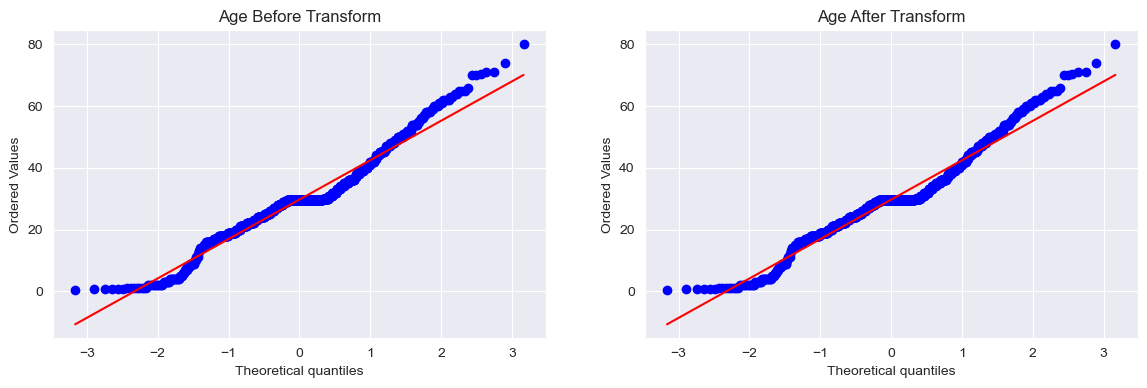

In [184]:
apply_transform_view(lambda x:x,'Age')